# Import libraries Here


In [0]:
#Basic imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Missing values imports
import missingno as msno
from math import floor

#sklearn imports --ADD on a need to use basis
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer




# Bring in dataset from github

---
To do this, upload your dataset unto a github repository. Click on the dataset in your repository, then click on **View Raw**. Copy the link to the raw dataset and store it as a string variable called url in Colab as shown below 
**OR**
go to my github https://github.com/julio-aguilar/ml-data-mining and get the raw from there.


In [0]:
url = 'https://raw.githubusercontent.com/julio-aguilar/ml-data-mining/master/A1_datasets/aps_failure_training_set.csv'
df = pd.read_csv(url, na_values=["na"])
# Dataset is now stored in a Pandas Dataframe
df.info()
df.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 171 entries, class to eg_000
dtypes: float64(169), int64(1), object(1)
memory usage: 78.3+ MB


,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,...,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
41169,neg,2626,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,200.0,75768.0,120894.0,19640.0,648.0,0.0,96992.0,0.0,272.0,0.0,0.0,0.0,197630.0,173630.0,37886.0,15592.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,125464.0,...,NaN,NaN,262.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1596.0,898.0,278.0,0.0,0.0,7042.0,1154.0,390740.0,66004.0,0.0,4392.0,0.0,0.0,1625990.0,182.56,172.0,49594.0,33106.0,30396.0,30974.0,72160.0,920.0,0.0,0.0,0.0,0.0,0.0,0.0
43094,neg,2860,0.0,6.0,NaN,0.0,0.0,0.0,0.0,0.0,26466.0,210092.0,80240.0,13974.0,0.0,0.0,0.0,105906.0,0.0,0.0,0.0,20832.0,31796.0,277354.0,276348.0,193974.0,8128.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,426.0,128.0,0.0,0.0,70.0,68236.0,0.0,0.0,0.0,0.0,2322.0,178.0,42.0,0.0,0.0,4732.0,596.0,661160.0,71482.0,0.0,0.0,0.0,0.0,1680880.0,460.84,388.0,171010.0,42358.0,11512.0,4820.0,13046.0,19006.0,24390.0,44450.0,180.0,0.0,0.0,0.0
19184,neg,32,NaN,12.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,106.0,6372.0,4850.0,0.0,0.0,0.0,4260.0,0.0,0.0,0.0,0.0,0.0,13018.0,11012.0,2862.0,764.0,0.0,0.0,0.0,0.0,20.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,11328.0,...,10.0,6288.0,60.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,166.0,0.0,2.0,0.0,0.0,310.0,94.0,440.0,42.0,0.0,0.0,0.0,0.0,0.0,51.28,44.0,6112.0,4614.0,554.0,38.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13634,neg,117640,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,86744.0,1845838.0,4971244.0,823694.0,10638.0,0.0,3197610.0,11308.0,0.0,NaN,334.0,568.0,5877436.0,4759414.0,2272136.0,1069380.0,NaN,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,434166.0,3938424.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83410.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1011280.0,1315364.0,1077900.0,613088.0,1085612.0,1164798.0,1006458.0,353904.0,109762.0,0.0,NaN,NaN
54361,neg,7624,2.0,52.0,NaN,0.0,0.0,0.0,0.0,0.0,112562.0,436722.0,74968.0,10016.0,0.0,0.0,0.0,271536.0,0.0,0.0,0.0,40106.0,60074.0,574634.0,559134.0,200368.0,38140.0,0.0,0.0,0.0,0.0,78.0,186.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,834.0,68.0,0.0,0.0,10.0,344.0,0.0,0.0,0.0,0.0,4462.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,809496.0,132.0,0.0,0.0,6623940.0,747.36,432.0,154032.0,141994.0,102150.0,30672.0,47546.0,39464.0,38932.0,78726.0,752.0,0.0,0.0,0.0


A deep copy  will be created to make sure that the original df is still available to do any more manipulation on it.

In [0]:
data_df = df.copy(deep=True)

# Part 1:Dropping Features(Columns)

In [0]:
print('Train columns with null values:\n', data_df.isnull().sum())
print("-"*10)
data_df.describe(include = 'all').head(5)

Train columns with null values:
 class         0
aa_000        0
ab_000    46329
ac_000     3335
ad_000    14861
          ...  
ee_007      671
ee_008      671
ee_009      671
ef_000     2724
eg_000     2723
Length: 171, dtype: int64
----------


,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,...,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
count,60000,60000.000000,13671.000000,5.666500e+04,45139.000000,57500.00000,57500.000000,59329.000000,59329.000000,59329.000000,59329.000000,59329.000000,5.932900e+04,5.932900e+04,59329.000000,59329.000000,59329.000000,5.935500e+04,59371.000000,59371.000000,55600.000000,59358.000000,59371.000000,5.935800e+04,5.941100e+04,5.935800e+04,59411.000000,57277.000000,59371.000000,59371.000000,59371.000000,57500.000000,57499.00000,59329.000000,59329.000000,59329.000000,59329.000000,59329.000000,59329.000000,5.932900e+04,...,46192.000000,4.619200e+04,57497.000000,57276.000000,55992.000000,55992.00000,55992.000000,55994.000000,55993.000000,55993.000000,55992.000000,55991.000000,59309.000000,57276.000000,57274.000000,5.727400e+04,57274.000000,57273.00000,57273.00000,5.727400e+04,57274.000000,57277.000000,57276.00000,57277.000000,57277.00000,5.599300e+04,49761.000000,50447.000000,59329.000000,59329.000000,59329.000000,59329.000000,59329.000000,59329.000000,59329.000000,59329.000000,59329.000000,59329.000000,57276.000000,57277.000000
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,neg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,59000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,59336.499567,0.713189,3.560143e+08,190620.639314,6.81913,11.006817,221.636367,975.722261,8606.014529,88591.281094,437096.632372,1.108374e+06,1.657818e+06,499309.804177,35569.891082,5114.753156,1.809931e+06,9016.965421,1143.674791,979.489964,59130.475589,93281.331829,3.461037e+06,3.002440e+06,1.004160e+06,442404.464325,0.496918,126.736521,5072.046285,230.580384,1117.825913,374.32738,12211.647997,10190.118795,10974.997994,7225.783883,10566.000405,111979.113958,1.078551e+06,...,13.416652,2.200752e+06,3123.961911,375.147112,2718.637841,5609.95703,4707.073332,37248.241597,39.938564,1861.312986,28541.774896,7923.227554,33745.454923,28507.846707,6958.652722,4.529375e+06,203759.847924,89654.99649,15403.35467,4.058712e+06,593834.975277,791208.481136,7780.34964,0.215759,1.56775,9.717093e+06,1353.131452,1452.155212,733404.212813,783874.590605,445489.728261,211126.447302,445734.306494,393946.197981,333058.240388,346271.429824,138729.983179,8388.914629,0.090579,0.212756


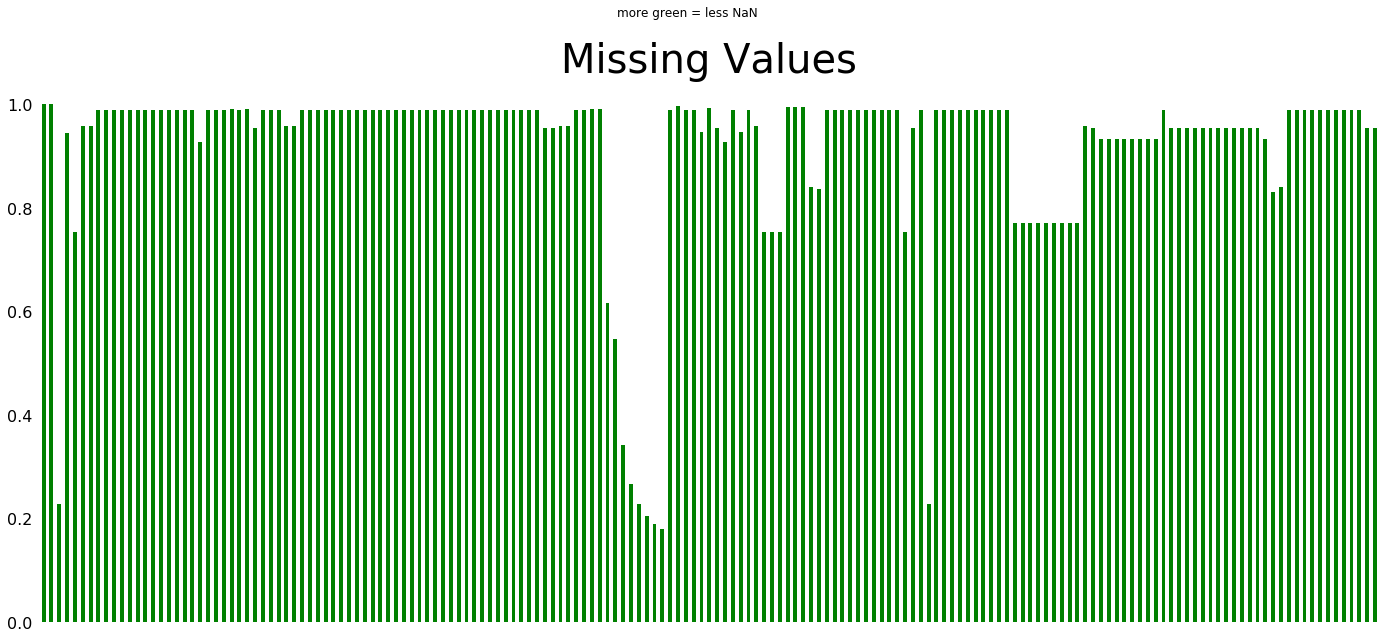

In [0]:
plt.title(label='Missing Values',fontsize=40)
plt.suptitle('more green = less NaN')
msno.bar(data_df,color='green')

colmiss and rowmiss have a list of features(colmiss) and id(rowmiss) where it is null

In [0]:
#all features with any null in column
colmiss=data_df.columns[data_df.isnull().any()].tolist()
#all rows with any null in row
rowmiss=data_df.T.columns[data_df.T.isnull().any()].tolist()

In [0]:
print('The percentage of rows with any null value in it is {}\n '.format(data_df.isnull().T.any().sum()*100/len(data_df)))
print('Feature   Percentage%\n {}'.format(data_df[colmiss].isnull().sum()*100/len(data_df)))

The percentage of rows with any null value in it is 99.015
 
Feature   Percentage%
 ab_000    77.215000
ac_000     5.558333
ad_000    24.768333
ae_000     4.166667
af_000     4.166667
            ...    
ee_007     1.118333
ee_008     1.118333
ee_009     1.118333
ef_000     4.540000
eg_000     4.538333
Length: 169, dtype: float64


#### Drop Column based on 60% Null

In [0]:
bound=floor(len(data_df)*.40)
dfclean_col=data_df.dropna(thresh=bound,axis='columns') 
print(('The shape of original df is {} and cleaned df is {}.'.format(data_df.shape,dfclean_col.shape)))
print('The amount of features required to not be NaN in column is: {}.'.format(bound))

The shape of original df is (60000, 171) and cleaned df is (60000, 163).
The amount of features required to not be NaN in column is: 24000.


#### Drop Row based on 10% Null

In [0]:
bound=floor(data_df.shape[1]*.90)
dfclean=dfclean_col.dropna(thresh=bound,axis='rows') 
print(('The shape of cleaned for columns df is {} and cleaned df is {}.'.format(dfclean_col.shape,dfclean.shape)))
print('The amount of features required to not be NaN in row is: {} after rows have been dropped.'.format(bound))

The shape of cleaned for columns df is (60000, 163) and cleaned df is (44691, 163).
The amount of features required to not be NaN in row is: 153 after rows have been dropped.


In [0]:
dfclean.shape

(44691, 163)

#### Dropping columns with 50% or more  of Zeros


In [0]:
print('The percentage of columns with 50% or more zeros in it is {}\n '.format(dfclean.isin([0]).sum()*100/len(dfclean)))
print('The amount of columns with 50% or more zeros in it is {}\n '.format(dfclean.isin([0]).sum()))

The percentage of columns with 50% or more zeros in it is class      0.000000
aa_000     0.599673
ac_000     3.345193
ad_000     4.334206
ae_000    95.958918
            ...    
ee_007    14.618156
ee_008    31.648430
ee_009    55.212459
ef_000    99.527869
eg_000    99.104965
Length: 163, dtype: float64
 
The amount of columns with 50% or more zeros in it is class         0
aa_000      268
ac_000     1495
ad_000     1937
ae_000    42885
          ...  
ee_007     6533
ee_008    14144
ee_009    24675
ef_000    44480
eg_000    44291
Length: 163, dtype: int64
 


In [0]:
col_over_50 = dfclean.isin([0]).sum()*100/len(dfclean) >= 50 
col_over_50 = col_over_50.index[col_over_50].values 
dfclean.drop(col_over_50,axis=1, inplace=True) 
dfclean.head(5)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,class,aa_000,ac_000,ad_000,ag_004,ag_005,ag_006,ag_007,ag_008,ah_000,an_000,ao_000,ap_000,aq_000,av_000,ax_000,ay_006,ay_007,ay_008,az_000,az_001,az_002,az_003,az_004,az_005,az_006,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,bb_000,bc_000,bd_000,be_000,bf_000,...,cn_009,co_000,cp_000,cq_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,ct_000,cu_000,cv_000,cx_000,cz_000,dc_000,dd_000,de_000,dn_000,do_000,dp_000,ds_000,dt_000,du_000,dv_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008
0,neg,76698,2.130706e+09,280.0,37250.0,1432864.0,3664156.0,1007684.0,25896.0,2551696.0,4933296.0,3655166.0,1766008.0,1132040.0,1012.0,268.0,4239660.0,703300.0,755876.0,5374.0,2108.0,4114.0,12348.0,615248.0,5526276.0,2378.0,2328746.0,1022304.0,415432.0,287230.0,310246.0,681504.0,1118814.0,3574.0,0.0,6700214.0,0.0,10.0,108.0,50.0,...,1608.0,220.0,240.0,6700214.0,10476.0,1226.0,267998.0,521832.0,428776.0,4015854.0,895240.0,26330.0,118.0,532.0,734.0,4122704.0,51288.0,532572.0,5330690.0,4732.0,1126.0,62282.0,85908.0,32790.0,202710.0,37928.0,14745580.0,1876644.0,2801180.0,2445.80,2712.0,965866.0,1706908.0,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0
2,neg,41040,2.280000e+02,100.0,1648.0,370592.0,1883374.0,292936.0,12016.0,1234132.0,2371990.0,2173634.0,300796.0,153698.0,358.0,110.0,870456.0,239798.0,1450312.0,1620.0,1156.0,1228.0,34250.0,1811606.0,710672.0,34.0,790690.0,672026.0,332340.0,254892.0,189596.0,135758.0,103552.0,81666.0,46.0,2673338.0,128.0,202.0,576.0,4.0,...,28.0,0.0,6.0,2673338.0,3584.0,500.0,56362.0,149726.0,100326.0,1744838.0,488302.0,16682.0,246.0,230.0,292.0,2180528.0,29188.0,20346.0,2341048.0,1494.0,152.0,13876.0,38182.0,8138.0,65772.0,10534.0,300240.0,48028.0,1040120.0,1018.64,1020.0,262032.0,453378.0,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0
3,neg,12,7.000000e+01,66.0,2212.0,3232.0,1872.0,0.0,0.0,2668.0,10184.0,7554.0,10764.0,1014.0,60.0,6.0,0.0,2038.0,5596.0,64.0,6.0,6.0,914.0,76.0,2478.0,2398.0,6176.0,340.0,304.0,102.0,74.0,406.0,216.0,16.0,0.0,21614.0,2.0,12.0,0.0,0.0,...,0.0,2.0,2.0,21614.0,1032.0,6.0,24.0,656.0,692.0,4836.0,388.0,0.0,0.0,138.0,8.0,1666.0,72.0,12.0,2578.0,76.0,62.0,232.0,0.0,0.0,48.0,18.0,15740.0,1822.0,0.0,1.08,54.0,5670.0,1566.0,240.0,46.0,58.0,44.0,10.0,0.0,0.0
4,neg,60874,1.368000e+03,458.0,43752.0,1966618.0,1800340.0,131646.0,4588.0,1974038.0,3230626.0,2618878.0,1058136.0,551022.0,1788.0,642.0,2128914.0,819596.0,584074.0,1644.0,362.0,562.0,842.0,30194.0,3911734.0,1606.0,1348578.0,1035668.0,338762.0,236540.0,182278.0,151778.0,163248.0,470800.0,19292.0,4289260.0,448.0,556.0,642.0,2.0,...,86.0,202.0,212.0,4289260.0,3942.0,520.0,80950.0,227322.0,186242.0,2288268.0,1137268.0,22228.0,204.0,1716.0,1664.0,3440288.0,215826.0,4262.0,3590004.0,2026.0,444.0,44946.0,62648.0,11506.0,149474.0,35154.0,457040.0,80482.0,21173050.0,1116.06,1176.0,404740.0,904230.0,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0
5,neg,38312,2.130706e+09,218.0,9128.0,701702.0,1462836.0,449716.0,39000.0,1087760.0,2283060.0,1892752.0,469244.0,347054.0,1142.0,452.0,1160742.0,774914.0,447274.0,1580.0,680.0,886.0,1270.0,42450.0,2615652.0,524.0,1037372.0,710296.0,244992.0,145738.0,99242.0,70704.0,90386.0,260950.0,3362.0,2752812.0,474.0,2974.0,502.0,4.0,...,200.0,2.0,18.0,2752812.0,3812.0,530.0,73228.0,155666.0,95538.0,1874972.0,443538.0,15672.0,86.0,400.0,1318.0,2028182.0,283762.0,3026.0,2393142.0,1628.0,44.0,21304.0,73432.0,16092.0,52748.0,12092.0,10244700.0,1126020.0,0.0,1013.14,1100.0,301078.0,481542.0,388574.0,288278.0,900430.0,300412.0,1534.0,338.0,856.0


#### Dropping rows with any value over 2M


In [0]:
row_over_2M = dfclean.T.isin([2_000_000]).sum() > 0
row_over_2M = row_over_2M.index[row_over_2M].values
print("Dropped {} row(s): {}".format(len(row_over_2M),row_over_2M))
dfclean.drop(row_over_2M,inplace=True)

Dropped 1 row(s): [19661]


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [0]:
dfclean.head(5)

,class,aa_000,ac_000,ad_000,ag_004,ag_005,ag_006,ag_007,ag_008,ah_000,an_000,ao_000,ap_000,aq_000,av_000,ax_000,ay_006,ay_007,ay_008,az_000,az_001,az_002,az_003,az_004,az_005,az_006,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,bb_000,bc_000,bd_000,be_000,bf_000,...,cn_009,co_000,cp_000,cq_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,ct_000,cu_000,cv_000,cx_000,cz_000,dc_000,dd_000,de_000,dn_000,do_000,dp_000,ds_000,dt_000,du_000,dv_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008
0,neg,76698,2.130706e+09,280.0,37250.0,1432864.0,3664156.0,1007684.0,25896.0,2551696.0,4933296.0,3655166.0,1766008.0,1132040.0,1012.0,268.0,4239660.0,703300.0,755876.0,5374.0,2108.0,4114.0,12348.0,615248.0,5526276.0,2378.0,2328746.0,1022304.0,415432.0,287230.0,310246.0,681504.0,1118814.0,3574.0,0.0,6700214.0,0.0,10.0,108.0,50.0,...,1608.0,220.0,240.0,6700214.0,10476.0,1226.0,267998.0,521832.0,428776.0,4015854.0,895240.0,26330.0,118.0,532.0,734.0,4122704.0,51288.0,532572.0,5330690.0,4732.0,1126.0,62282.0,85908.0,32790.0,202710.0,37928.0,14745580.0,1876644.0,2801180.0,2445.80,2712.0,965866.0,1706908.0,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0
2,neg,41040,2.280000e+02,100.0,1648.0,370592.0,1883374.0,292936.0,12016.0,1234132.0,2371990.0,2173634.0,300796.0,153698.0,358.0,110.0,870456.0,239798.0,1450312.0,1620.0,1156.0,1228.0,34250.0,1811606.0,710672.0,34.0,790690.0,672026.0,332340.0,254892.0,189596.0,135758.0,103552.0,81666.0,46.0,2673338.0,128.0,202.0,576.0,4.0,...,28.0,0.0,6.0,2673338.0,3584.0,500.0,56362.0,149726.0,100326.0,1744838.0,488302.0,16682.0,246.0,230.0,292.0,2180528.0,29188.0,20346.0,2341048.0,1494.0,152.0,13876.0,38182.0,8138.0,65772.0,10534.0,300240.0,48028.0,1040120.0,1018.64,1020.0,262032.0,453378.0,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0
3,neg,12,7.000000e+01,66.0,2212.0,3232.0,1872.0,0.0,0.0,2668.0,10184.0,7554.0,10764.0,1014.0,60.0,6.0,0.0,2038.0,5596.0,64.0,6.0,6.0,914.0,76.0,2478.0,2398.0,6176.0,340.0,304.0,102.0,74.0,406.0,216.0,16.0,0.0,21614.0,2.0,12.0,0.0,0.0,...,0.0,2.0,2.0,21614.0,1032.0,6.0,24.0,656.0,692.0,4836.0,388.0,0.0,0.0,138.0,8.0,1666.0,72.0,12.0,2578.0,76.0,62.0,232.0,0.0,0.0,48.0,18.0,15740.0,1822.0,0.0,1.08,54.0,5670.0,1566.0,240.0,46.0,58.0,44.0,10.0,0.0,0.0
4,neg,60874,1.368000e+03,458.0,43752.0,1966618.0,1800340.0,131646.0,4588.0,1974038.0,3230626.0,2618878.0,1058136.0,551022.0,1788.0,642.0,2128914.0,819596.0,584074.0,1644.0,362.0,562.0,842.0,30194.0,3911734.0,1606.0,1348578.0,1035668.0,338762.0,236540.0,182278.0,151778.0,163248.0,470800.0,19292.0,4289260.0,448.0,556.0,642.0,2.0,...,86.0,202.0,212.0,4289260.0,3942.0,520.0,80950.0,227322.0,186242.0,2288268.0,1137268.0,22228.0,204.0,1716.0,1664.0,3440288.0,215826.0,4262.0,3590004.0,2026.0,444.0,44946.0,62648.0,11506.0,149474.0,35154.0,457040.0,80482.0,21173050.0,1116.06,1176.0,404740.0,904230.0,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0
5,neg,38312,2.130706e+09,218.0,9128.0,701702.0,1462836.0,449716.0,39000.0,1087760.0,2283060.0,1892752.0,469244.0,347054.0,1142.0,452.0,1160742.0,774914.0,447274.0,1580.0,680.0,886.0,1270.0,42450.0,2615652.0,524.0,1037372.0,710296.0,244992.0,145738.0,99242.0,70704.0,90386.0,260950.0,3362.0,2752812.0,474.0,2974.0,502.0,4.0,...,200.0,2.0,18.0,2752812.0,3812.0,530.0,73228.0,155666.0,95538.0,1874972.0,443538.0,15672.0,86.0,400.0,1318.0,2028182.0,283762.0,3026.0,2393142.0,1628.0,44.0,21304.0,73432.0,16092.0,52748.0,12092.0,10244700.0,1126020.0,0.0,1013.14,1100.0,301078.0,481542.0,388574.0,288278.0,900430.0,300412.0,1534.0,338.0,856.0


In [0]:
target_var = dfclean['class']
dfclean.drop('class',inplace=True,axis=1)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


#Part 2: Imputing Feature Values

#### Imputing with Mean

In [0]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(dfclean)
dfclean_columns = dfclean.columns.values
df_filled_mean = imp.transform(dfclean)
df_filled_mean = pd.DataFrame(df_filled_mean,columns=dfclean_columns)
df_filled_mean.head(5)

,aa_000,ac_000,ad_000,ag_004,ag_005,ag_006,ag_007,ag_008,ah_000,an_000,ao_000,ap_000,aq_000,av_000,ax_000,ay_006,ay_007,ay_008,az_000,az_001,az_002,az_003,az_004,az_005,az_006,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,...,cn_009,co_000,cp_000,cq_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,ct_000,cu_000,cv_000,cx_000,cz_000,dc_000,dd_000,de_000,dn_000,do_000,dp_000,ds_000,dt_000,du_000,dv_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008
0,76698.0,2.130706e+09,280.0,37250.0,1432864.0,3664156.0,1007684.0,25896.0,2551696.0,4933296.0,3655166.0,1766008.0,1132040.0,1012.0,268.0,4239660.0,703300.0,755876.0,5374.0,2108.0,4114.0,12348.0,615248.0,5526276.0,2378.0,2328746.0,1022304.0,415432.0,287230.0,310246.0,681504.0,1118814.0,3574.0,0.0,6700214.0,0.0,10.0,108.0,50.0,2551696.0,...,1608.0,220.0,240.0,6700214.0,10476.0,1226.0,267998.0,521832.0,428776.0,4015854.0,895240.0,26330.0,118.0,532.0,734.0,4122704.0,51288.0,532572.0,5330690.0,4732.0,1126.0,62282.0,85908.0,32790.0,202710.0,37928.0,14745580.0,1876644.0,2801180.0,2445.80,2712.0,965866.0,1706908.0,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0
1,41040.0,2.280000e+02,100.0,1648.0,370592.0,1883374.0,292936.0,12016.0,1234132.0,2371990.0,2173634.0,300796.0,153698.0,358.0,110.0,870456.0,239798.0,1450312.0,1620.0,1156.0,1228.0,34250.0,1811606.0,710672.0,34.0,790690.0,672026.0,332340.0,254892.0,189596.0,135758.0,103552.0,81666.0,46.0,2673338.0,128.0,202.0,576.0,4.0,1234132.0,...,28.0,0.0,6.0,2673338.0,3584.0,500.0,56362.0,149726.0,100326.0,1744838.0,488302.0,16682.0,246.0,230.0,292.0,2180528.0,29188.0,20346.0,2341048.0,1494.0,152.0,13876.0,38182.0,8138.0,65772.0,10534.0,300240.0,48028.0,1040120.0,1018.64,1020.0,262032.0,453378.0,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0
2,12.0,7.000000e+01,66.0,2212.0,3232.0,1872.0,0.0,0.0,2668.0,10184.0,7554.0,10764.0,1014.0,60.0,6.0,0.0,2038.0,5596.0,64.0,6.0,6.0,914.0,76.0,2478.0,2398.0,6176.0,340.0,304.0,102.0,74.0,406.0,216.0,16.0,0.0,21614.0,2.0,12.0,0.0,0.0,2668.0,...,0.0,2.0,2.0,21614.0,1032.0,6.0,24.0,656.0,692.0,4836.0,388.0,0.0,0.0,138.0,8.0,1666.0,72.0,12.0,2578.0,76.0,62.0,232.0,0.0,0.0,48.0,18.0,15740.0,1822.0,0.0,1.08,54.0,5670.0,1566.0,240.0,46.0,58.0,44.0,10.0,0.0,0.0
3,60874.0,1.368000e+03,458.0,43752.0,1966618.0,1800340.0,131646.0,4588.0,1974038.0,3230626.0,2618878.0,1058136.0,551022.0,1788.0,642.0,2128914.0,819596.0,584074.0,1644.0,362.0,562.0,842.0,30194.0,3911734.0,1606.0,1348578.0,1035668.0,338762.0,236540.0,182278.0,151778.0,163248.0,470800.0,19292.0,4289260.0,448.0,556.0,642.0,2.0,1974038.0,...,86.0,202.0,212.0,4289260.0,3942.0,520.0,80950.0,227322.0,186242.0,2288268.0,1137268.0,22228.0,204.0,1716.0,1664.0,3440288.0,215826.0,4262.0,3590004.0,2026.0,444.0,44946.0,62648.0,11506.0,149474.0,35154.0,457040.0,80482.0,21173050.0,1116.06,1176.0,404740.0,904230.0,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0
4,38312.0,2.130706e+09,218.0,9128.0,701702.0,1462836.0,449716.0,39000.0,1087760.0,2283060.0,1892752.0,469244.0,347054.0,1142.0,452.0,1160742.0,774914.0,447274.0,1580.0,680.0,886.0,1270.0,42450.0,2615652.0,524.0,1037372.0,710296.0,244992.0,145738.0,99242.0,70704.0,90386.0,260950.0,3362.0,2752812.0,474.0,2974.0,502.0,4.0,1087760.0,...,200.0,2.0,18.0,2752812.0,3812.0,530.0,73228.0,155666.0,95538.0,1874972.0,443538.0,15672.0,86.0,400.0,1318.0,2028182.0,283762.0,3026.0,2393142.0,1628.0,44.0,21304.0,73432.0,16092.0,52748.0,12092.0,10244700.0,1126020.0,0.0,1013.14,1100.0,301078.0,481542.0,388574.0,288278.0,900430.0,300412.0,1534.0,338.0,856.0


#### Imputing with Median

In [0]:
imp = SimpleImputer(missing_values=np.nan, strategy='median')
imp.fit(dfclean)
df_filled_median = imp.transform(dfclean)
df_filled_median = pd.DataFrame(df_filled_median,columns=dfclean_columns)
df_filled_median.head(5)

,aa_000,ac_000,ad_000,ag_004,ag_005,ag_006,ag_007,ag_008,ah_000,an_000,ao_000,ap_000,aq_000,av_000,ax_000,ay_006,ay_007,ay_008,az_000,az_001,az_002,az_003,az_004,az_005,az_006,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,...,cn_009,co_000,cp_000,cq_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,ct_000,cu_000,cv_000,cx_000,cz_000,dc_000,dd_000,de_000,dn_000,do_000,dp_000,ds_000,dt_000,du_000,dv_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008
0,76698.0,2.130706e+09,280.0,37250.0,1432864.0,3664156.0,1007684.0,25896.0,2551696.0,4933296.0,3655166.0,1766008.0,1132040.0,1012.0,268.0,4239660.0,703300.0,755876.0,5374.0,2108.0,4114.0,12348.0,615248.0,5526276.0,2378.0,2328746.0,1022304.0,415432.0,287230.0,310246.0,681504.0,1118814.0,3574.0,0.0,6700214.0,0.0,10.0,108.0,50.0,2551696.0,...,1608.0,220.0,240.0,6700214.0,10476.0,1226.0,267998.0,521832.0,428776.0,4015854.0,895240.0,26330.0,118.0,532.0,734.0,4122704.0,51288.0,532572.0,5330690.0,4732.0,1126.0,62282.0,85908.0,32790.0,202710.0,37928.0,14745580.0,1876644.0,2801180.0,2445.80,2712.0,965866.0,1706908.0,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0
1,41040.0,2.280000e+02,100.0,1648.0,370592.0,1883374.0,292936.0,12016.0,1234132.0,2371990.0,2173634.0,300796.0,153698.0,358.0,110.0,870456.0,239798.0,1450312.0,1620.0,1156.0,1228.0,34250.0,1811606.0,710672.0,34.0,790690.0,672026.0,332340.0,254892.0,189596.0,135758.0,103552.0,81666.0,46.0,2673338.0,128.0,202.0,576.0,4.0,1234132.0,...,28.0,0.0,6.0,2673338.0,3584.0,500.0,56362.0,149726.0,100326.0,1744838.0,488302.0,16682.0,246.0,230.0,292.0,2180528.0,29188.0,20346.0,2341048.0,1494.0,152.0,13876.0,38182.0,8138.0,65772.0,10534.0,300240.0,48028.0,1040120.0,1018.64,1020.0,262032.0,453378.0,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0
2,12.0,7.000000e+01,66.0,2212.0,3232.0,1872.0,0.0,0.0,2668.0,10184.0,7554.0,10764.0,1014.0,60.0,6.0,0.0,2038.0,5596.0,64.0,6.0,6.0,914.0,76.0,2478.0,2398.0,6176.0,340.0,304.0,102.0,74.0,406.0,216.0,16.0,0.0,21614.0,2.0,12.0,0.0,0.0,2668.0,...,0.0,2.0,2.0,21614.0,1032.0,6.0,24.0,656.0,692.0,4836.0,388.0,0.0,0.0,138.0,8.0,1666.0,72.0,12.0,2578.0,76.0,62.0,232.0,0.0,0.0,48.0,18.0,15740.0,1822.0,0.0,1.08,54.0,5670.0,1566.0,240.0,46.0,58.0,44.0,10.0,0.0,0.0
3,60874.0,1.368000e+03,458.0,43752.0,1966618.0,1800340.0,131646.0,4588.0,1974038.0,3230626.0,2618878.0,1058136.0,551022.0,1788.0,642.0,2128914.0,819596.0,584074.0,1644.0,362.0,562.0,842.0,30194.0,3911734.0,1606.0,1348578.0,1035668.0,338762.0,236540.0,182278.0,151778.0,163248.0,470800.0,19292.0,4289260.0,448.0,556.0,642.0,2.0,1974038.0,...,86.0,202.0,212.0,4289260.0,3942.0,520.0,80950.0,227322.0,186242.0,2288268.0,1137268.0,22228.0,204.0,1716.0,1664.0,3440288.0,215826.0,4262.0,3590004.0,2026.0,444.0,44946.0,62648.0,11506.0,149474.0,35154.0,457040.0,80482.0,21173050.0,1116.06,1176.0,404740.0,904230.0,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0
4,38312.0,2.130706e+09,218.0,9128.0,701702.0,1462836.0,449716.0,39000.0,1087760.0,2283060.0,1892752.0,469244.0,347054.0,1142.0,452.0,1160742.0,774914.0,447274.0,1580.0,680.0,886.0,1270.0,42450.0,2615652.0,524.0,1037372.0,710296.0,244992.0,145738.0,99242.0,70704.0,90386.0,260950.0,3362.0,2752812.0,474.0,2974.0,502.0,4.0,1087760.0,...,200.0,2.0,18.0,2752812.0,3812.0,530.0,73228.0,155666.0,95538.0,1874972.0,443538.0,15672.0,86.0,400.0,1318.0,2028182.0,283762.0,3026.0,2393142.0,1628.0,44.0,21304.0,73432.0,16092.0,52748.0,12092.0,10244700.0,1126020.0,0.0,1013.14,1100.0,301078.0,481542.0,388574.0,288278.0,900430.0,300412.0,1534.0,338.0,856.0


#### Imputing with KNN

In [0]:
imputer = KNNImputer(n_neighbors=3)
df_filled_KNN = imputer.fit_transform(dfclean)


In [0]:
dfclean_columns = dfclean.columns
df_filled_KNN = pd.DataFrame(df_filled_KNN,columns=dfclean_columns)

In [0]:
df_filled_KNN.head(5)

,aa_000,ac_000,ad_000,ag_004,ag_005,ag_006,ag_007,ag_008,ah_000,an_000,ao_000,ap_000,aq_000,av_000,ax_000,ay_006,ay_007,ay_008,az_000,az_001,az_002,az_003,az_004,az_005,az_006,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,...,cn_009,co_000,cp_000,cq_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,ct_000,cu_000,cv_000,cx_000,cz_000,dc_000,dd_000,de_000,dn_000,do_000,dp_000,ds_000,dt_000,du_000,dv_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008
0,76698.0,2.130706e+09,280.0,37250.0,1432864.0,3664156.0,1007684.0,25896.0,2551696.0,4933296.0,3655166.0,1766008.0,1132040.0,1012.0,268.0,4239660.0,703300.0,755876.0,5374.0,2108.0,4114.0,12348.0,615248.0,5526276.0,2378.0,2328746.0,1022304.0,415432.0,287230.0,310246.0,681504.0,1118814.0,3574.0,0.0,6700214.0,0.0,10.0,108.0,50.0,2551696.0,...,1608.0,220.0,240.0,6700214.0,10476.0,1226.0,267998.0,521832.0,428776.0,4015854.0,895240.0,26330.0,118.0,532.0,734.0,4122704.0,51288.0,532572.0,5330690.0,4732.0,1126.0,62282.0,85908.0,32790.0,202710.0,37928.0,14745580.0,1876644.0,2801180.0,2445.80,2712.0,965866.0,1706908.0,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0
1,41040.0,2.280000e+02,100.0,1648.0,370592.0,1883374.0,292936.0,12016.0,1234132.0,2371990.0,2173634.0,300796.0,153698.0,358.0,110.0,870456.0,239798.0,1450312.0,1620.0,1156.0,1228.0,34250.0,1811606.0,710672.0,34.0,790690.0,672026.0,332340.0,254892.0,189596.0,135758.0,103552.0,81666.0,46.0,2673338.0,128.0,202.0,576.0,4.0,1234132.0,...,28.0,0.0,6.0,2673338.0,3584.0,500.0,56362.0,149726.0,100326.0,1744838.0,488302.0,16682.0,246.0,230.0,292.0,2180528.0,29188.0,20346.0,2341048.0,1494.0,152.0,13876.0,38182.0,8138.0,65772.0,10534.0,300240.0,48028.0,1040120.0,1018.64,1020.0,262032.0,453378.0,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0
2,12.0,7.000000e+01,66.0,2212.0,3232.0,1872.0,0.0,0.0,2668.0,10184.0,7554.0,10764.0,1014.0,60.0,6.0,0.0,2038.0,5596.0,64.0,6.0,6.0,914.0,76.0,2478.0,2398.0,6176.0,340.0,304.0,102.0,74.0,406.0,216.0,16.0,0.0,21614.0,2.0,12.0,0.0,0.0,2668.0,...,0.0,2.0,2.0,21614.0,1032.0,6.0,24.0,656.0,692.0,4836.0,388.0,0.0,0.0,138.0,8.0,1666.0,72.0,12.0,2578.0,76.0,62.0,232.0,0.0,0.0,48.0,18.0,15740.0,1822.0,0.0,1.08,54.0,5670.0,1566.0,240.0,46.0,58.0,44.0,10.0,0.0,0.0
3,60874.0,1.368000e+03,458.0,43752.0,1966618.0,1800340.0,131646.0,4588.0,1974038.0,3230626.0,2618878.0,1058136.0,551022.0,1788.0,642.0,2128914.0,819596.0,584074.0,1644.0,362.0,562.0,842.0,30194.0,3911734.0,1606.0,1348578.0,1035668.0,338762.0,236540.0,182278.0,151778.0,163248.0,470800.0,19292.0,4289260.0,448.0,556.0,642.0,2.0,1974038.0,...,86.0,202.0,212.0,4289260.0,3942.0,520.0,80950.0,227322.0,186242.0,2288268.0,1137268.0,22228.0,204.0,1716.0,1664.0,3440288.0,215826.0,4262.0,3590004.0,2026.0,444.0,44946.0,62648.0,11506.0,149474.0,35154.0,457040.0,80482.0,21173050.0,1116.06,1176.0,404740.0,904230.0,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0
4,38312.0,2.130706e+09,218.0,9128.0,701702.0,1462836.0,449716.0,39000.0,1087760.0,2283060.0,1892752.0,469244.0,347054.0,1142.0,452.0,1160742.0,774914.0,447274.0,1580.0,680.0,886.0,1270.0,42450.0,2615652.0,524.0,1037372.0,710296.0,244992.0,145738.0,99242.0,70704.0,90386.0,260950.0,3362.0,2752812.0,474.0,2974.0,502.0,4.0,1087760.0,...,200.0,2.0,18.0,2752812.0,3812.0,530.0,73228.0,155666.0,95538.0,1874972.0,443538.0,15672.0,86.0,400.0,1318.0,2028182.0,283762.0,3026.0,2393142.0,1628.0,44.0,21304.0,73432.0,16092.0,52748.0,12092.0,10244700.0,1126020.0,0.0,1013.14,1100.0,301078.0,481542.0,388574.0,288278.0,900430.0,300412.0,1534.0,338.0,856.0


#### Results of each

In [0]:
# df_filled 
print('The percentage of rows with any null value in it is {}\n '.format(df_filled_KNN.isnull().any().sum()*100/len(df_filled_KNN)))
print('The percentage of rows with any null value in it is {}\n '.format(df_filled_mean.isnull().any().sum()*100/len(df_filled_mean)))
print('The percentage of rows with any null value in it is {}\n '.format(df_filled_median.isnull().any().sum()*100/len(df_filled_median)))

The percentage of rows with any null value in it is 0.0
 
The percentage of rows with any null value in it is 0.0
 
The percentage of rows with any null value in it is 0.0
 
